In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from utils import COLORS, color_coding

In [2]:
GRAPH_PATH = './graphs/graph_2.graphml'
SOCIODEMOGRAPHIC_PATH = "./data/Sociodemographic_survey/answers_sociodemographic_survey.pkl"

In [3]:
G = nx.read_graphml(GRAPH_PATH)

## Graph Visualization

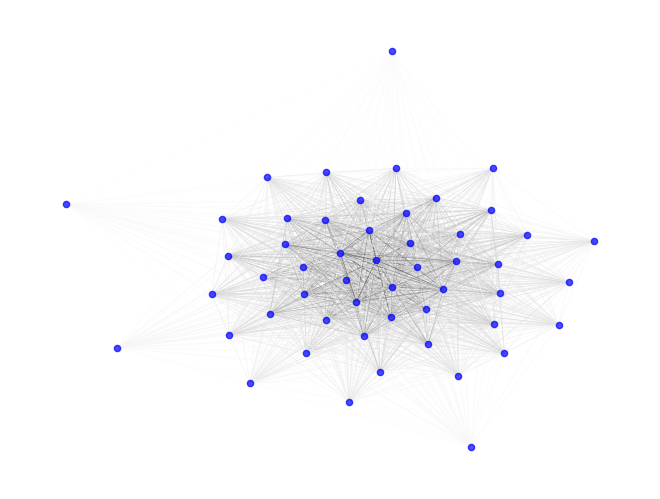

In [4]:
cmap = plt.cm.Greys # edge colors
nx.draw(G, 
        pos= nx.spring_layout(G, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

Try coloring nodes by gender

In [5]:
df_sociodem = pd.read_pickle(SOCIODEMOGRAPHIC_PATH)

In [6]:
color_map = color_coding(G, df_sociodem, sociodem_entry='genere',colors_dict=COLORS)
# color_map

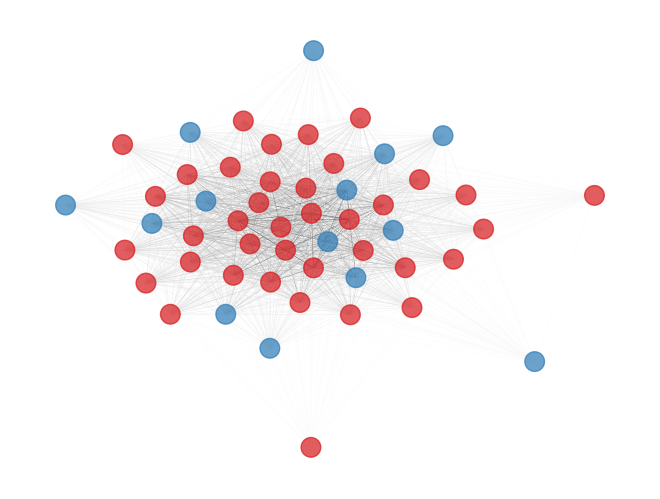

In [7]:
cmap = plt.cm.Greys 
nx.draw(G, 
        pos= nx.spring_layout(G, k=1, iterations=500),
        font_color="w",
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.3, 
        edge_cmap=cmap, 
        node_color=color_map, 
        alpha=0.7,
        node_size=200, 
        with_labels = False, 
        font_weight ="bold") 

## Graph analysis

### Node degrees

In [8]:
nodes = G.nodes()
edges = G.edges()
print(f'Number of nodes: {len(nodes)} \nNumber of edges: {len(edges)}')

Number of nodes: 52 
Number of edges: 1326


<Axes: ylabel='Frequency'>

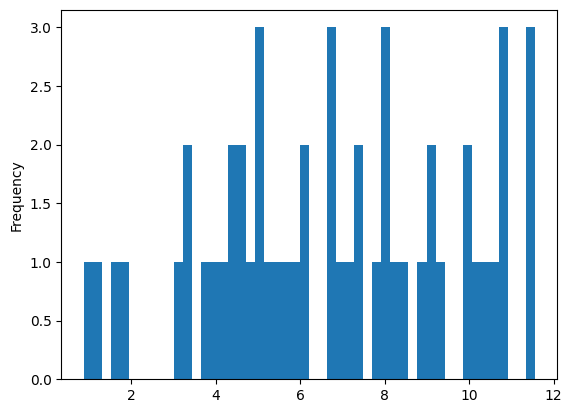

In [9]:
k = [x[1] for x in G.degree(weight='weight')]
k_dS = pd.Series(k)
k_dS.plot(kind='hist', bins=50)

### Quantiles computation

In [10]:
k_dS_25_quantile = k_dS.quantile(q=0.25)
k_dS_75_quantile = k_dS.quantile(q=0.75)
mean = k_dS.mean()

In [11]:
print(f'25 quantile: {k_dS_25_quantile}\n75 quantile {k_dS_75_quantile}\nmean {mean}')

25 quantile: 4.597435897435897
75 quantile 9.081410256410255
mean 6.754437869822484


Try to plot historgram + quantiles

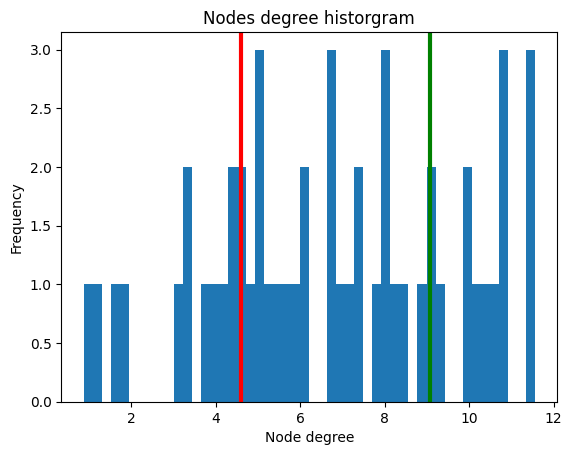

In [12]:
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram')
_ = plt.hist(k_dS, bins=50, histtype='barstacked')
plt.axvline(k_dS_25_quantile, color='r', linestyle='-', linewidth=3)
plt.axvline(k_dS_75_quantile, color='g', linestyle='-', linewidth=3)

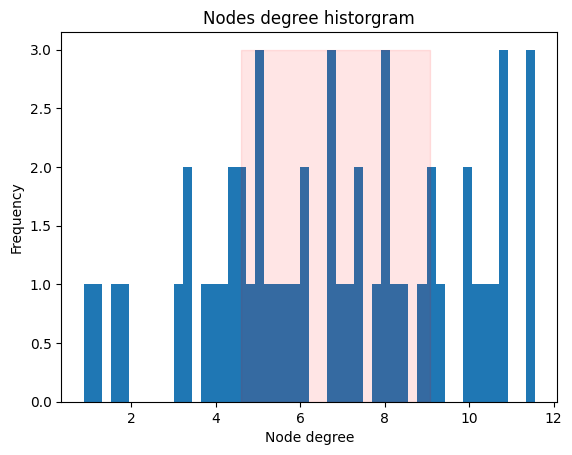

In [13]:
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Nodes degree historgram')
_ = plt.hist(k_dS, bins=50, histtype='barstacked')
plt.fill_betweenx(y=[0, 3], x1=k_dS_25_quantile, x2=k_dS_75_quantile, color='r', alpha=0.1)

### Edge attributes

In [14]:
edge_attr = nx.get_edge_attributes(G, 'weight')
for key, item in edge_attr.items():
    print(f'{key}: {item}')
    break

('4e53c5c', 'bd4b2f4'): 0.39999999999999997


### Graph properties

#### Shortest path & Diameter

In [15]:
def get_edge_weight(
    node1: str,
    attr: dict
) -> float:
    """
    Function necessary to compute shortest_path.
    Given 2 nodes, return its weight.
    
    Args:
        - node1: first node id
        - node2: second node id
        - attr: dict with the edge attributes
    Returns:
        - weight: the edge weight
    """
    return attr['weight']

In [17]:
shortest_path = nx.shortest_path(G, weight='weight')
print(f'Shortest path to all nodes for a specific node: \n{shortest_path["4e53c5c"]}')

Shortest path to all nodes for a specific node: 
{'4e53c5c': ['4e53c5c'], 'bd4b2f4': ['4e53c5c', 'ea8c0d6', 'bd4b2f4'], 'aa07d95': ['4e53c5c', 'ea8c0d6', 'aa07d95'], 'db7d9c3': ['4e53c5c', 'ea8c0d6', 'db7d9c3'], '6bac72b': ['4e53c5c', 'ea8c0d6', '6bac72b'], '962a7dd': ['4e53c5c', 'ea8c0d6', '962a7dd'], '446ad6c': ['4e53c5c', 'ea8c0d6', '446ad6c'], '693ef79': ['4e53c5c', 'ea8c0d6', '693ef79'], '8ec15bc': ['4e53c5c', 'ea8c0d6', '8ec15bc'], '41f2447': ['4e53c5c', 'ea8c0d6', '41f2447'], '34d8485': ['4e53c5c', 'ea8c0d6', '34d8485'], '49db8c4': ['4e53c5c', 'ea8c0d6', '49db8c4'], 'c4bba29': ['4e53c5c', 'ea8c0d6', 'c4bba29'], '1a8e45b': ['4e53c5c', 'ea8c0d6', '1a8e45b'], '6e93efd': ['4e53c5c', 'ea8c0d6', '6e93efd'], 'c94e42e': ['4e53c5c', 'ea8c0d6', 'c94e42e'], '7a35b75': ['4e53c5c', 'ea8c0d6', '7a35b75'], '6568ea1': ['4e53c5c', 'ea8c0d6', '6568ea1'], '2f5762a': ['4e53c5c', 'ea8c0d6', '2f5762a'], '62447b9': ['4e53c5c', 'ea8c0d6', '62447b9'], '2541155': ['4e53c5c', 'ea8c0d6', '2541155'], '7b3c4

In [20]:
diameter = nx.diameter(G)
print(f'Diameter: {diameter}')

Diameter: 1


In [18]:
e_path = nx.eccentricity(G, v='4e53c5c', sp=shortest_path, weight='weight')
e_value = nx.eccentricity(G, v='4e53c5c', weight='weight')
print(f'Eccentricity with shortest path: {e_path}')
print(f'Eccentricity: {e_value}') # 1 is rare. If edges are not connected, it sets 1 as default value

Eccentricity with shortest path: ['4e53c5c', 'ea8c0d6', 'fc2538d']
Eccentricity: 0.04358974358974359


In [ ]:
w1 = edge_attr[(e_path[0], e_path[1])]
w2 = edge_attr[(e_path[1], e_path[2])] # this 2 are not connected?
print(f'w1: {w1}\nw2: {w2}')